Process:
- train on: 
    - mNist: 
        - X ... 55,000
        - Y ... 55,000 (just a vector of "1"s)
- test on:
    - mNist: 
        - x_test ... 10,000
        - y_test ... 10,000 (just a vector of "1"s)
    - notMist:
        - x_ood_test ... 10,000
        - y_ood_test ... 10,000 (just a vector of "-1"s)
- calculate % correct:
    - mNist test -> predict(x_test) / 10,000 = 0.9082
    - notMnist test -> predict(x_ood_test) / 10,000 = 0.9934
- calculate distances from decision boundary:
    - mNist test -> decision_function(x_test)
    - notMnist test -> decision_function(x_ood_test)
    - * note: the signs for the distances should match the signs of the predictions *
- calculate distributions of distances and overlay them
- calculate overlap of distributions

In [ ]:
from sklearn import svm

In [1]:
from __future__ import absolute_import
from __future__ import division
# from __future__ import print_function
from builtins import input

#import system things
from numpy import genfromtxt
from tensorflow.examples.tutorials.mnist import input_data # for data
import tensorflow as tf
import numpy as np
import os

#import helpers
import inference
import visualize

# MNIST ###################################################
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
mnist_test_data = mnist.test.images
mnist_test_data = mnist_test_data.reshape([-1, 28, 28])
mnist_test_labels = mnist.test.labels
###########################################################

# NOT MNIST ###############################################
# notMnist_siam = input_data.read_data_sets("notMNIST_data_real", one_hot=False) # for siamese embedding !!!

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Extracting notMNIST_data_real/train-images-idx3-ubyte.gz
Extracting notMNIST_data_real/train-labels-idx1-ubyte.gz
Extracting notMNIST_data_real/t10k-images-idx3-ubyte.gz
Extracting notMNIST_data_real/t10k-labels-idx1-ubyte.gz


In [3]:
from __future__ import absolute_import
from __future__ import division
# from __future__ import print_function
from builtins import input

#import system things
from numpy import genfromtxt
from tensorflow.examples.tutorials.mnist import input_data # for data
import tensorflow as tf
import numpy as np
import os

#import helpers
import inference
import visualize

In [194]:
notMnist_data_graph = extract_data('notMNIST_data_real/t10k-images-idx3-ubyte.gz', 10000)
notMnist_data_graph = notMnist_data_graph/float(255) # so to compare with mnist

In [195]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [196]:
mnist_train_data = mnist.train.images[:60000]
mnist_test_data = mnist.test.images[:60000]

X = mnist_train_data
Y = np.ones((55000,))
x_test = mnist_test_data

print X.shape
print Y.shape
print x_test.shape

(55000, 784)
(55000,)
(10000, 784)


In [200]:
print 55000*784
print 45000*3072

43120000
138240000


In [54]:
import gzip
def extract_data(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, 28,28)
        return data
    
def extract_labels(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        return labels

In [55]:
notMnist_data= extract_data('notMNIST_data_real/t10k-images-idx3-ubyte.gz', 60000)
notMnist_data = notMnist_data_graph/float(255) # so to compare with mnist
notMnist_labels = extract_labels('notMNIST_data_real/t10k-labels-idx1-ubyte.gz',10000)
notMnist_labels_plus10 = notMnist_labels+10
notMnist_y = notMnist_labels_plus10[:10]

In [197]:
print notMnist_data_graph.shape
notMnist_x = notMnist_data_graph.reshape(10000,784)[:10000]

print notMnist_x.shape
print notMnist_y.shape

(10000, 28, 28)
(10000, 784)
(10,)


In [67]:
print notMnist_y

[13 15 19 12 17 12 19 18 15 13]


In [123]:
from IPython.display import Audio, display

def allDone():
    display(Audio(url='http://www.wavsource.com/snds_2018-06-03_5106726768923853/animals/cat_purr.wav', autoplay=True))
allDone()

In [124]:
from sklearn.ensemble import IsolationForest

oc_svm_clf = svm.OneClassSVM(gamma=0.001, kernel='rbf', nu=0.08)  # Obtained using grid search
if_clf = IsolationForest(contamination=0.08, max_features=1.0, max_samples=1.0, n_estimators=40)  # Obtained using grid search

oc_svm_clf.fit(X)
if_clf.fit(X)

oc_svm_preds = oc_svm_clf.predict(X)
if_preds = if_clf.predict(X)

allDone()

In [128]:
from sklearn.mixture import GaussianMixture
from sklearn.isotonic import IsotonicRegression

gmm_clf = GaussianMixture(covariance_type='spherical', n_components=18, max_iter=int(1e7))  # Obtained via grid search
gmm_clf.fit(X)
log_probs_val = gmm_clf.score_samples(X)
isotonic_regressor = IsotonicRegression(out_of_bounds='clip')
isotonic_regressor.fit(log_probs_val, Y)  # y_val is for labels 0 - not food 1 - food (validation set)

allDone()

In [277]:
good = 0
for each in oc_svm_clf.predict(x_test):
    if each==1:
        good+=1
print good/10000.0

good = 0
for each in oc_svm_clf.predict(notMnist_x):
    if each==-1:
        good+=1
print good/10000.0

log_probs_test = gmm_clf.score_samples(x_test)
test_probabilities = isotonic_regressor.predict(log_probs_test)

log_probs_test_ood = gmm_clf.score_samples(notMnist_x)
test_probabilities_ood = isotonic_regressor.predict(log_probs_test_ood)

0.9242
0.992


In [131]:
# Obtaining results on the test set
log_probs_test = gmm_clf.score_samples(x_test)
test_probabilities = isotonic_regressor.predict(log_probs_test)
test_predictions = [1 if prob >= 0.5 else 0 for prob in test_probabilities]

log_probs_test_ood = gmm_clf.score_samples(notMnist_x)
test_probabilities_ood = isotonic_regressor.predict(log_probs_test_ood)
test_predictions_ood = [1 if prob >= 0.5 else 0 for prob in test_probabilities_ood]

print test_probabilities
# print test_predictions

print test_probabilities_ood
# print test_predictions_ood

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


In [136]:
print clf.decision_function(x_test)[:10]

[[ 0.59008267]
 [-0.38687246]
 [ 0.61710088]
 [ 1.03668667]
 [ 0.83821852]
 [ 0.55550355]
 [ 0.5226533 ]
 [ 0.44263098]
 [ 0.248081  ]
 [ 0.46087598]]


In [134]:
print clf.decision_function(notMnist_x)[:10]

[[-11.24876974]
 [ -7.71886172]
 [ -3.57994594]
 [ -4.95576778]
 [ -6.62109074]
 [ -6.96008436]
 [ -9.04628454]
 [-13.4263838 ]
 [-17.01591748]
 [-13.54207839]]


# <font color=magenta> Plot histogram of distances from decision boundary for mnist and notmnist test sets.

In [189]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_1))
    return intersection

In [159]:
mnistDistances = list(clf.decision_function(mnist_test_data))
notmnistDistance = list(clf.decision_function(notMnist_x))

notmnistDistance = [x[0] for x in notmnistDistance]
mnistDistances = [x[0] for x in mnistDistances]

10000
10000


In [187]:
print min(notmnistDistance),max(mnistDistances)

-26.13671820583069 1.5357325178663217


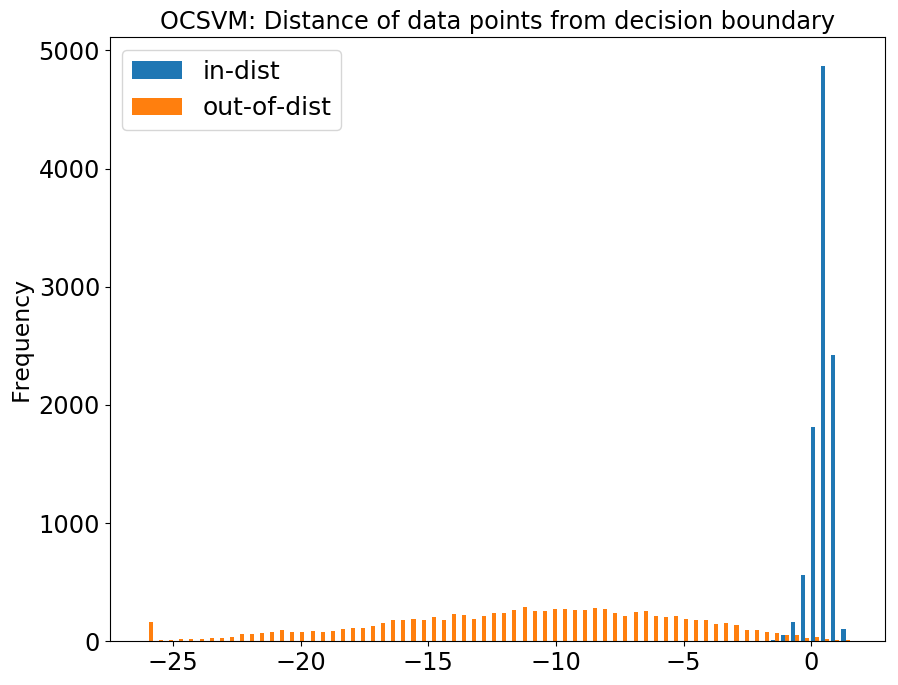

0.0253


In [278]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8),dpi=100)
plt.hist([mnistDistances, notmnistDistance], bins=70, label=['in-dist', 'out-of-dist'])
plt.legend(fontsize=18)
plt.ylabel("Frequency",fontsize=17)
plt.title("OCSVM: Distance of data points from decision boundary",fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.savefig("OCSVM,distances_0253new")
plt.show()

hist1, bins1 = np.histogram(mnistDistances,bins=25,range=(-27,2))
hist2, bins2 = np.histogram(notmnistDistance,bins=25,range=(-27,2))
print return_intersection(hist1,hist2)

0.9966216099999999


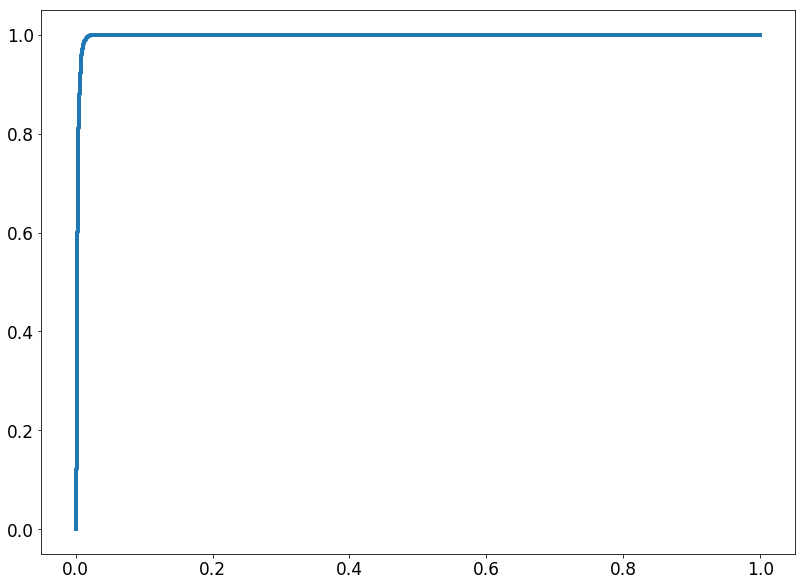

In [218]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true = np.concatenate( ( np.ones(len(mnistDistances)), np.zeros(len(notmnistDistance)) ) )
# print -min(myVars_inDist)
y_score = np.concatenate((mnistDistances , notmnistDistance))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc_metric = auc(fpr, tpr)

print(auc_metric)

plt.figure(figsize=(13.5,10))
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.plot(fpr, tpr, linewidth=4)
# plt.savefig('final figs/ROC OCSVM _ 996621')
plt.show()

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# fit the model
clf = svm.OneClassSVM(nu=0.08, kernel="rbf", gamma=0.001)
clf.fit(mnist_train_data)

y_pred_train = clf.predict(mnist_train_data)
y_pred_test = clf.predict(mnist_test_data)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

y_pred_test_notMnist = clf.predict(notMnist_data)
n_error_test_notMnist = y_pred_test_notMnist[y_pred_test_notMnist == -1].size

# print y_pred_train
# print y_pred_test
print mnist_test_labels
print y_pred_test
print n_error_train/1000.0
print n_error_test/10.0

print notMnist_labels_plus10[:10]
print n_error_test_notMnist/10.0

# y_pred_outliers = clf.predict(X_outliers)
# n_error_train = y_pred_train[y_pred_train == -1].size
# n_error_test = y_pred_test[y_pred_test == -1].size
# n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

[7 2 1 0 4 1 4 9 5 9]
[ 1 -1  1  1  1  1  1  1  1  1]
0.084
0.1
[13 15 19 12 17 12 19 18 15 13]
0.0


# <font color=magenta> Visualize boundary . . . . .

In [219]:
mnistDistances = list(clf.decision_function(mnist_test_data))
notmnistDistance = list(clf.decision_function(notMnist_x))

notmnistDistance = [x[0] for x in notmnistDistance]
mnistDistances = [x[0] for x in mnistDistances]

-11.248769735037222


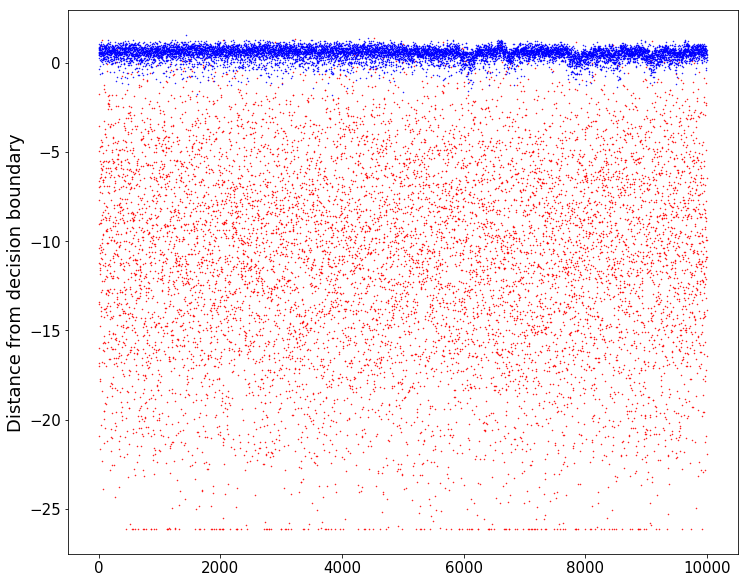

In [269]:
import matplotlib.pyplot as plt

y_min = min(min(notmnistDistance),min(mnistDistances))
y_max = max(max(notmnistDistance),max(mnistDistances))
x_notMnist = [i for i in range(len(notmnistDistance))]
x_Mnist = [i for i in range(len(mnistDistances))]

plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Distance from decision boundary",fontsize=18)
plt.scatter(x_notMnist,notmnistDistance,c='red',s=0.25)
plt.scatter(x_Mnist,mnistDistances,c='blue',s=0.25)
plt.savefig('final figs/OCSVM scatter')
plt.show()